In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=yf.download(['GOOG','^VIX'],
               start='2000-01-01',
               end='2023-03-28',
               progress=False)

In [4]:
df

Adj Close                  Close                   High  \
                  GOOG       ^VIX        GOOG       ^VIX        GOOG   
Date                                                                   
2000-01-03         NaN  24.209999         NaN  24.209999         NaN   
2000-01-04         NaN  27.010000         NaN  27.010000         NaN   
2000-01-05         NaN  26.410000         NaN  26.410000         NaN   
2000-01-06         NaN  25.730000         NaN  25.730000         NaN   
2000-01-07         NaN  21.719999         NaN  21.719999         NaN   
...                ...        ...         ...        ...         ...   
2023-03-21  105.839996  21.379999  105.839996  21.379999  105.959999   
2023-03-22  104.220001  22.260000  104.220001  22.260000  107.510002   
2023-03-23  106.260002  22.610001  106.260002  22.610001  107.100998   
2023-03-24  106.059998  21.740000  106.059998  21.740000  106.160004   
2023-03-27  103.714996  20.790001  103.714996  20.790001  105.400002   

                              Low                   Open             \
                 ^VIX        GOOG       ^VIX        GOOG       ^VIX   
Date                                                                  
2000-01-03  26.150000         NaN  23.980000         NaN  24.360001   
2000-01-04  27.180000         NaN  24.799999         NaN  24.940001   
2000-01-05  29.000000         NaN  25.850000         NaN  27.980000   
2000-01-06  26.709999         NaN  24.700001         NaN  26.680000   
2000-01-07  25.170000         NaN  21.719999         NaN  25.139999   
...               ...         ...        ...         ...        ...   
2023-03-21  24.160000  101.860001  21.290001  101.980003  24.160000   
2023-03-22  22.379999  104.209999  19.940001  105.139999  21.799999   
2023-03-23  24.910000  105.410004  20.160000  105.889999  21.540001   
2023-03-24  25.209999  104.739998  21.600000  105.739998  22.110001   
2023-03-27  22.930000  102.629997  20.570000  105.320000  22.049999   

                Volume       
                  GOOG ^VIX  
Date                         
2000-01-03         NaN    0  
2000-01-04         NaN    0  
2000-01-05         NaN    0  
2000-01-06         NaN    0  
2000-01-07         NaN    0  
...                ...  ...  
2023-03-21  33122800.0    0  
2023-03-22  32336900.0    0  
2023-03-23  31385800.0    0  
2023-03-24  25236200.0    0  
2023-03-27  18702752.0    0  

[5845 rows x 12 columns]

In [5]:
df=df[['Adj Close']]
df

Adj Close           
                  GOOG       ^VIX
Date                             
2000-01-03         NaN  24.209999
2000-01-04         NaN  27.010000
2000-01-05         NaN  26.410000
2000-01-06         NaN  25.730000
2000-01-07         NaN  21.719999
...                ...        ...
2023-03-21  105.839996  21.379999
2023-03-22  104.220001  22.260000
2023-03-23  106.260002  22.610001
2023-03-24  106.059998  21.740000
2023-03-27  103.714996  20.790001

[5845 rows x 2 columns]

In [6]:
df.columns=df.columns.droplevel(0)
df.columns

Index(['GOOG', '^VIX'], dtype='object')

In [7]:
df=df.rename(columns={'GOOG':'goog','^VIX':'VIX'})

In [8]:
df

,goog,VIX
Date,,
2000-01-03,NaN,24.209999
2000-01-04,NaN,27.010000
2000-01-05,NaN,26.410000
2000-01-06,NaN,25.730000
2000-01-07,NaN,21.719999
...,...,...
2023-03-21,105.839996,21.379999
2023-03-22,104.220001,22.260000
2023-03-23,106.260002,22.610001


In [9]:
df.head()

,goog,VIX
Date,,
2000-01-03,NaN,24.209999
2000-01-04,NaN,27.010000
2000-01-05,NaN,26.410000
2000-01-06,NaN,25.730000
2000-01-07,NaN,21.719999


In [10]:
df.tail()

,goog,VIX
Date,,
2023-03-21,105.839996,21.379999
2023-03-22,104.220001,22.260000
2023-03-23,106.260002,22.610001
2023-03-24,106.059998,21.740000
2023-03-27,103.714996,20.790001


In [11]:
df['log_rtn']=np.log(df.goog/df.goog.shift(1))
df['log_rtn']

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2023-03-21    0.037642
2023-03-22   -0.015424
2023-03-23    0.019385
2023-03-24   -0.001884
2023-03-27   -0.022358
Name: log_rtn, Length: 5845, dtype: float64

In [12]:
df['VIXlog_rtn']=np.log(df.VIX/df.VIX.shift(1))
df['VIXlog_rtn']

Date
2000-01-03         NaN
2000-01-04    0.109441
2000-01-05   -0.022464
2000-01-06   -0.026085
2000-01-07   -0.169424
                ...   
2023-03-21   -0.121828
2023-03-22    0.040335
2023-03-23    0.015601
2023-03-24   -0.039238
2023-03-27   -0.044682
Name: VIXlog_rtn, Length: 5845, dtype: float64

In [13]:
df['log_rtn'],df['VIXlog_rtn']

(Date
 2000-01-03         NaN
 2000-01-04         NaN
 2000-01-05         NaN
 2000-01-06         NaN
 2000-01-07         NaN
                 ...   
 2023-03-21    0.037642
 2023-03-22   -0.015424
 2023-03-23    0.019385
 2023-03-24   -0.001884
 2023-03-27   -0.022358
 Name: log_rtn, Length: 5845, dtype: float64, Date
 2000-01-03         NaN
 2000-01-04    0.109441
 2000-01-05   -0.022464
 2000-01-06   -0.026085
 2000-01-07   -0.169424
                 ...   
 2023-03-21   -0.121828
 2023-03-22    0.040335
 2023-03-23    0.015601
 2023-03-24   -0.039238
 2023-03-27   -0.044682
 Name: VIXlog_rtn, Length: 5845, dtype: float64)

In [14]:
df.dropna(how='any',axis=0,inplace=True)

In [15]:
df.dropna()

,goog,VIX,log_rtn,VIXlog_rtn
Date,,,,
2004-08-20,2.697639,16.000000,0.076433,-0.058269
2004-08-23,2.724787,15.880000,0.010013,-0.007528
2004-08-24,2.611960,15.330000,-0.042289,-0.035249
2004-08-25,2.640104,14.980000,0.010717,-0.023096
2004-08-26,2.687676,14.910000,0.017859,-0.004684
...,...,...,...,...
2023-03-21,105.839996,21.379999,0.037642,-0.121828
2023-03-22,104.220001,22.260000,-0.015424,0.040335
2023-03-23,106.260002,22.610001,0.019385,0.015601


In [16]:
corr_coeff=df.log_rtn.corr(df.VIXlog_rtn)

In [17]:
corr_coeff

-0.48567301742652713

[Text(0.5, 1.0, 'GOOG VS VIX ($\\rho$=-0.49)')]

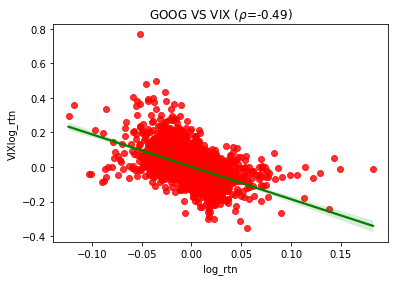

In [18]:
ax=sns.regplot(x='log_rtn',color='red',y='VIXlog_rtn',data=df,line_kws={'color':'green'})
ax.set(title=f'GOOG VS VIX ($\\rho$={corr_coeff:.2f})')